In [1]:
import numpy as np
import xarray as xr
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

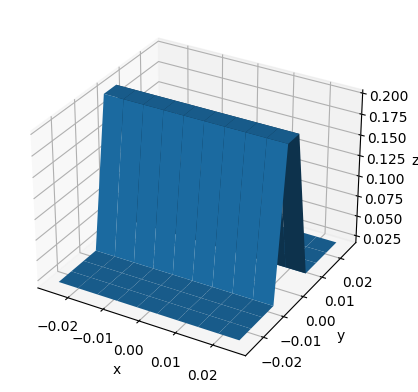

In [2]:
n_grid = 50
n_time = 400
dt = 0.000001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  1*np.exp(- (X**2 + Y**2)/(0.001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100
diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')



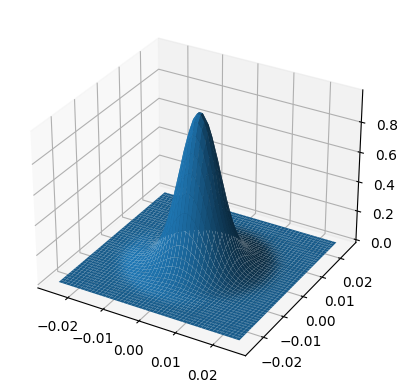

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [4]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)
result_ds

<xarray.DataArray 'concentration' (x: 50, y: 50, t: 400)> Size: 8MB
array([[[1.38879439e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.83506169e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [9.83506169e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.38879439e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.02533352e-10, 1.08406367e-10, 1.13318826e-10, ...,
         9.36292502e+29, 1.32084166e+30, 1.86329740e+30],
        [2.67233371e-10, 2.82214121e-10, 2.96386914e-10, ...,
         1.78755762e+30, 2.52155961e+30, 3.55689370e+30],
...
        [2.67233371e-10, 2.82214121e-10, 2.96386914e-10, ...,
         1.78755762e+30, 2.52155961e+30, 3.55689370e+30],
        [1.02533352e-10, 1.08406367e-10, 1.13318826e-10, ...,
         9.36292502e+29, 1.32084166e+30, 1.86329740e+30],
        [3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.38879439e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.83506169e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [9.83506169e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.77356255e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.38879439e-11, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * x        (x) float64 400B -0.025 -0.02398 -0.02296 ... 0.02296 0.02398 0.025
  * y        (y) float64 400B -0.025 -0.02398 -0.02296 ... 0.02296 0.02398 0.025
  * t        (t) float64 3kB 0.0 1.003e-06 2.005e-06 ... 0.000399 0.0004
Attributes:
    dx:                     0.0010204081632653062
    dy:                     0.0010204081632653062
    dt:                     1.0025062656641603e-06
    n_grid:                 50
    n_time:                 400
    initial_condition:      [[1.38879439e-11 3.77356255e-11 9.83506169e-11 .....
    diffusion_coefficient:  [0.02       0.01585743 0.01422833 0.01454717 0.01...
    metadata:               Generated by forward_euler_final

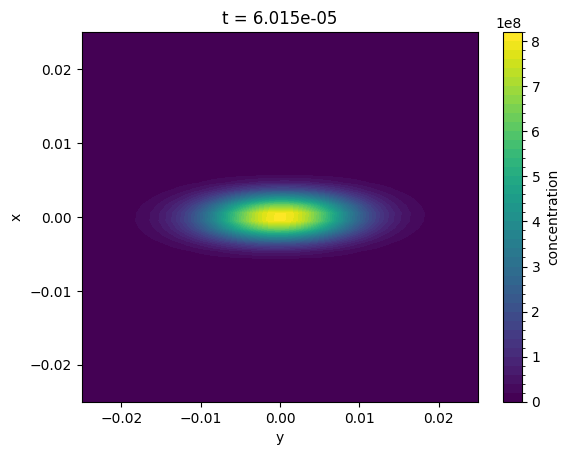

In [7]:
xr.plot.contourf(result_ds.isel(t=80), levels=50)


In [6]:
fig, ax = plot_mass_conservation(result_ds)

KeyError: 'diffusion'